In [1]:
#     https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFiles/Luxury_Beauty.json.gz
#     https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/metaFiles2/meta_Luxury_Beauty.json.gz
#    Download this files and extract them in the root folder 

import pandas as pd

# Read the JSON file into a Pandas DataFrame
df_review = pd.read_json('Luxury_Beauty.json', lines=True)


# Read the JSON file into a Pandas DataFrame
df_meta = pd.read_json('meta_Luxury_Beauty.json', lines=True)

# Show the first few rows of the DataFrame to confirm the successful loading
df_review.head()

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image
0,2,3,True,"06 15, 2010",A1Q6MUU0B2ZDQG,B00004U9V2,D. Poston,"I bought two of these 8.5 fl oz hand cream, an...",dispensers don't work,1276560000,NaN,NaN
1,5,14,True,"01 7, 2010",A3HO2SQDCZIE9S,B00004U9V2,chandra,"Believe me, over the years I have tried many, ...",Best hand cream ever.,1262822400,NaN,NaN
2,5,NaN,True,"04 18, 2018",A2EM03F99X3RJZ,B00004U9V2,Maureen G,Great hand lotion,Five Stars,1524009600,{'Size:': ' 3.5 oz.'},NaN
3,5,NaN,True,"04 18, 2018",A3Z74TDRGD0HU,B00004U9V2,Terry K,This is the best for the severely dry skin on ...,Five Stars,1524009600,{'Size:': ' 3.5 oz.'},NaN
4,5,NaN,True,"04 17, 2018",A2UXFNW9RTL4VM,B00004U9V2,Patricia Wood,The best non- oily hand cream ever. It heals o...,I always have a backup ready.,1523923200,{'Size:': ' 3.5 oz.'},NaN


In [2]:
import pandas as pd

# Load the sample dataset
dataset_path = 'Sample_Luxury_Beauty.csv'  # Replace with your actual path
sample_data = pd.read_csv(dataset_path)

# Step 1: Drop unnecessary columns
cleaned_data = sample_data.drop(columns=['Unnamed: 0', 'unixReviewTime', 'image'])

# Step 2: Handle missing values
# Filling missing 'vote' values with 0
cleaned_data['vote'].fillna(0, inplace=True)

# Removing rows with missing 'reviewText' or 'summary'
cleaned_data.dropna(subset=['reviewText', 'summary'], inplace=True)

# Step 3: Convert 'reviewTime' to datetime object
cleaned_data['reviewTime'] = pd.to_datetime(cleaned_data['reviewTime'], format='%m %d, %Y')

# Step 4: One-hot encode or label-encode categorical variables (in this case, 'verified')
# Convert 'verified' to integer (True -> 1, False -> 0)
cleaned_data['verified'] = cleaned_data['verified'].astype(int)

# Show the first few rows of the cleaned data
cleaned_data.head()


,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,style
0,2,3.0,1,2010-06-15,A1Q6MUU0B2ZDQG,B00004U9V2,D. Poston,"I bought two of these 8.5 fl oz hand cream, an...",dispensers don't work,NaN
1,5,14.0,1,2010-01-07,A3HO2SQDCZIE9S,B00004U9V2,chandra,"Believe me, over the years I have tried many, ...",Best hand cream ever.,NaN
2,5,0.0,1,2018-04-18,A2EM03F99X3RJZ,B00004U9V2,Maureen G,Great hand lotion,Five Stars,{'Size:': ' 3.5 oz.'}
3,5,0.0,1,2018-04-18,A3Z74TDRGD0HU,B00004U9V2,Terry K,This is the best for the severely dry skin on ...,Five Stars,{'Size:': ' 3.5 oz.'}
4,5,0.0,1,2018-04-17,A2UXFNW9RTL4VM,B00004U9V2,Patricia Wood,The best non- oily hand cream ever. It heals o...,I always have a backup ready.,{'Size:': ' 3.5 oz.'}


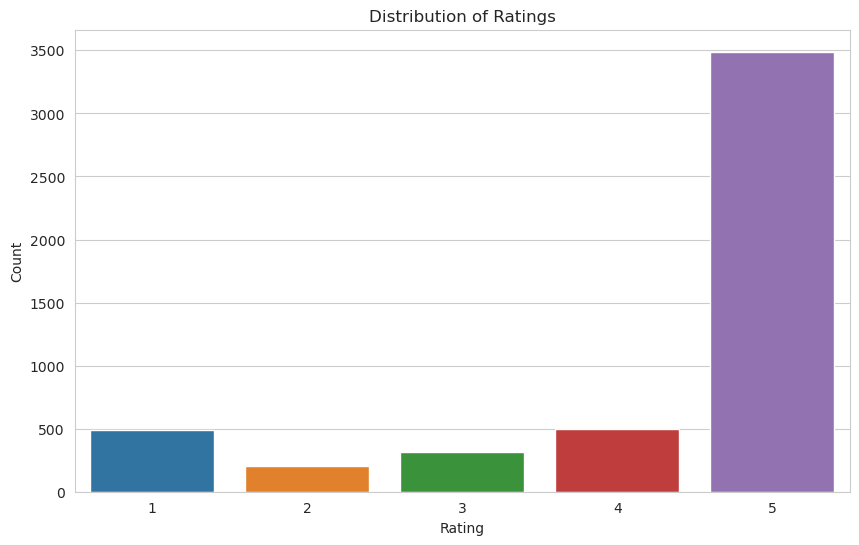

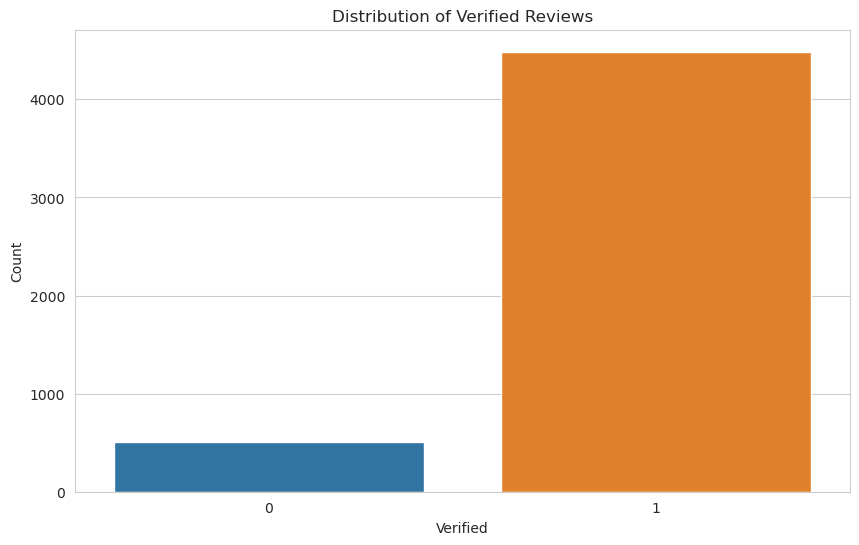

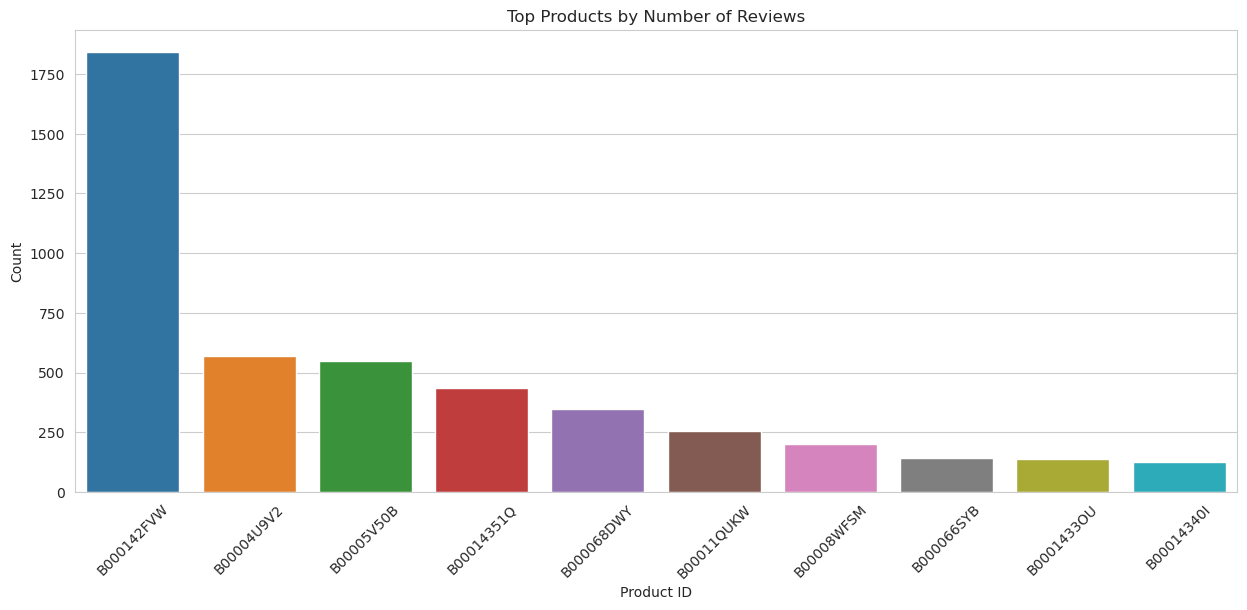

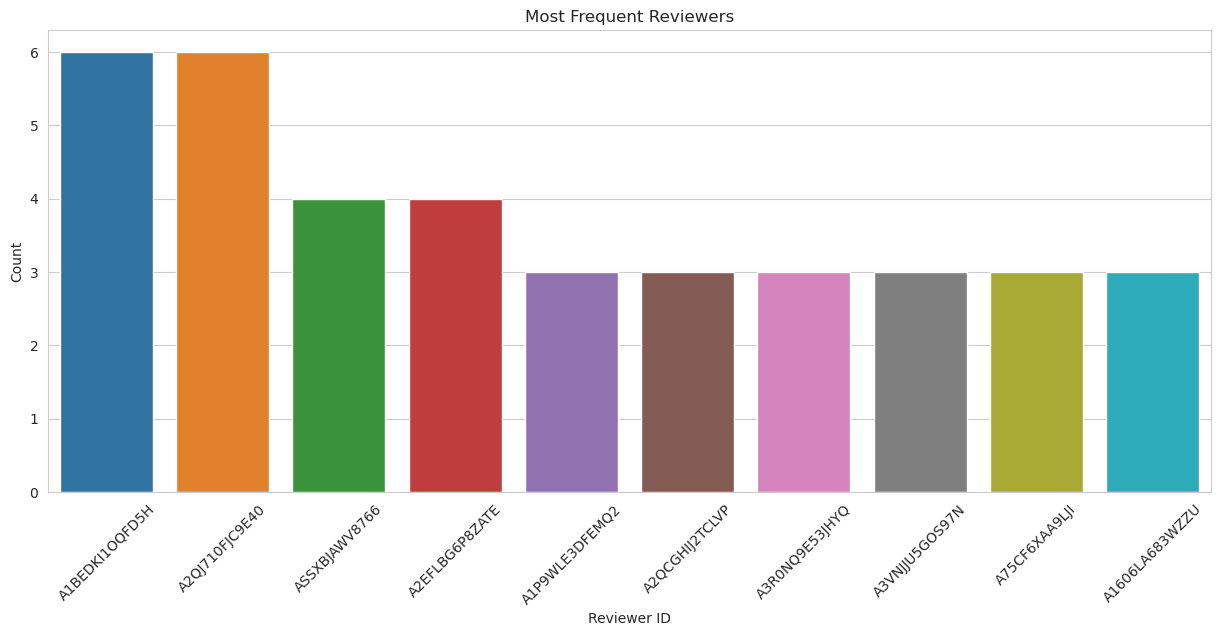

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'cleaned_data' is your cleaned DataFrame

# Distribution of ratings (overall)
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data, x='overall')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Distribution of verified reviews
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data, x='verified')
plt.title('Distribution of Verified Reviews')
plt.xlabel('Verified')
plt.ylabel('Count')
plt.show()

# Top products by number of reviews
plt.figure(figsize=(15, 6))
top_products = cleaned_data['asin'].value_counts().head(10).index
sns.countplot(data=cleaned_data, x='asin', order=top_products)
plt.title('Top Products by Number of Reviews')
plt.xlabel('Product ID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Most frequent reviewers
plt.figure(figsize=(15, 6))
top_reviewers = cleaned_data['reviewerID'].value_counts().head(10).index
sns.countplot(data=cleaned_data, x='reviewerID', order=top_reviewers)
plt.title('Most Frequent Reviewers')
plt.xlabel('Reviewer ID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


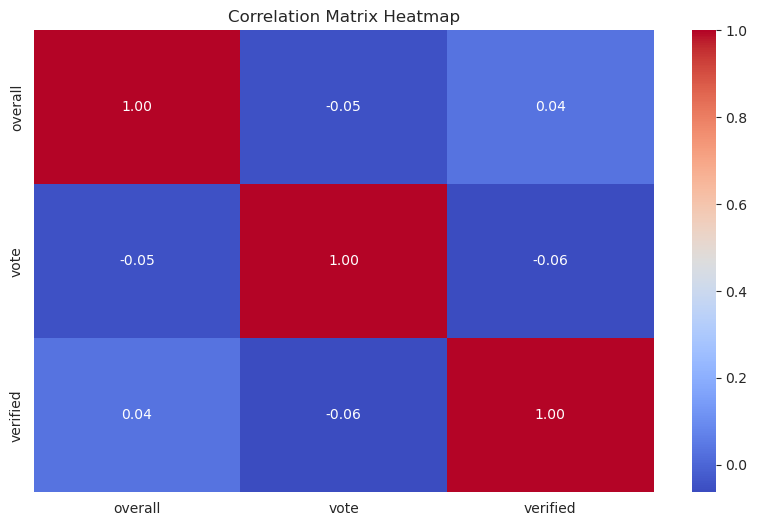

In [4]:
# Assuming 'cleaned_data' is your cleaned DataFrame

# Correlation matrix with explicit numeric_only=True
correlation_matrix = cleaned_data.corr(numeric_only=True)

# Heatmap for correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [5]:
df_review.head()

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image
0,2,3,True,"06 15, 2010",A1Q6MUU0B2ZDQG,B00004U9V2,D. Poston,"I bought two of these 8.5 fl oz hand cream, an...",dispensers don't work,1276560000,NaN,NaN
1,5,14,True,"01 7, 2010",A3HO2SQDCZIE9S,B00004U9V2,chandra,"Believe me, over the years I have tried many, ...",Best hand cream ever.,1262822400,NaN,NaN
2,5,NaN,True,"04 18, 2018",A2EM03F99X3RJZ,B00004U9V2,Maureen G,Great hand lotion,Five Stars,1524009600,{'Size:': ' 3.5 oz.'},NaN
3,5,NaN,True,"04 18, 2018",A3Z74TDRGD0HU,B00004U9V2,Terry K,This is the best for the severely dry skin on ...,Five Stars,1524009600,{'Size:': ' 3.5 oz.'},NaN
4,5,NaN,True,"04 17, 2018",A2UXFNW9RTL4VM,B00004U9V2,Patricia Wood,The best non- oily hand cream ever. It heals o...,I always have a backup ready.,1523923200,{'Size:': ' 3.5 oz.'},NaN


In [6]:
from textblob import TextBlob

# Function to get the sentiment polarity
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

# Add a new column for sentiment analysis of 'reviewText'
cleaned_data['sentiment'] = cleaned_data['reviewText'].apply(get_sentiment)


In [7]:
cleaned_data

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,style,sentiment
0,2,3.0,1,2010-06-15,A1Q6MUU0B2ZDQG,B00004U9V2,D. Poston,"I bought two of these 8.5 fl oz hand cream, an...",dispensers don't work,NaN,0.270000
1,5,14.0,1,2010-01-07,A3HO2SQDCZIE9S,B00004U9V2,chandra,"Believe me, over the years I have tried many, ...",Best hand cream ever.,NaN,0.259583
2,5,0.0,1,2018-04-18,A2EM03F99X3RJZ,B00004U9V2,Maureen G,Great hand lotion,Five Stars,{'Size:': ' 3.5 oz.'},0.800000
3,5,0.0,1,2018-04-18,A3Z74TDRGD0HU,B00004U9V2,Terry K,This is the best for the severely dry skin on ...,Five Stars,{'Size:': ' 3.5 oz.'},0.466667
4,5,0.0,1,2018-04-17,A2UXFNW9RTL4VM,B00004U9V2,Patricia Wood,The best non- oily hand cream ever. It heals o...,I always have a backup ready.,{'Size:': ' 3.5 oz.'},1.000000
...,...,...,...,...,...,...,...,...,...,...,...
4995,4,0.0,1,2016-10-24,A1QRAIXTSA1BV0,B000142FVW,JDF,Nice summer/spring pink color.,Four Stars,{'Color:': ' Soft Pink'},0.250000
4996,5,0.0,1,2016-10-24,AM3XG32V2KWI6,B000142FVW,Jenn P,This one definitely needs two coats but is so ...,The perfect dainty little pink polish,{'Color:': ' Bubble Bath'},0.097813
4997,5,0.0,1,2016-10-24,AFRSM9VEQV9MZ,B000142FVW,slowpokcav,My favorite all time color!,Five Stars,"{'Color:': "" It's a Girl!""}",0.625000
4998,5,0.0,1,2016-10-23,AEMIPUKP4YK5Z,B000142FVW,Alex &amp;amp; Amanda Peterson Family,Great color for fall/toenails.,Five Stars,{'Color:': ' Lincoln Park After Dark'},0.800000


Using TextBlob

TextBlob is a simple library for processing textual data, providing tools for common NLP tasks. One of its features is sentiment analysis.

In [8]:
from textblob import TextBlob

# Function to get the sentiment polarity using TextBlob
def get_sentiment_textblob(text):
    return TextBlob(str(text)).sentiment.polarity

# Add a new column for TextBlob sentiment analysis of 'reviewText'
cleaned_data['sentiment_textblob'] = cleaned_data['reviewText'].apply(get_sentiment_textblob)


Using VADER

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a sentiment analysis tool specifically designed to recognize sentiment in text, particularly for short texts like tweets or reviews.

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Function to get the compound sentiment score using VADER
def get_sentiment_vader(text):
    return sia.polarity_scores(str(text))['compound']

# Add a new column for VADER sentiment analysis of 'reviewText'
cleaned_data['sentiment_vader'] = cleaned_data['reviewText'].apply(get_sentiment_vader)


Using Bag of Words Vectorization-Based Models

In this method, we'll use a simple bag-of-words vectorizer to represent the text and then use a basic classifier to predict the sentiment. Here, we'll use logistic regression as the classifier.

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Prepare data
X = cleaned_data['reviewText']
y = (cleaned_data['overall'] > 3).astype(int)  # Assuming ratings above 3 as positive
vectorizer = CountVectorizer()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Initialize and train classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_vectorized, y_train)

# Add prediction to the dataframe
cleaned_data['sentiment_bow'] = clf.predict(vectorizer.transform(cleaned_data['reviewText']))


Using LSTM-Based Models

LSTM (Long Short-Term Memory) models are a type of recurrent neural network that are good at learning from sequences of data, like text.

Note: This example uses TensorFlow and Keras.

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Prepare data
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=100, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=100, padding='post', truncating='post')

# Initialize and train LSTM model
model = Sequential([
    Embedding(5000, 64),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_padded, y_train, epochs=5, validation_data=(X_test_padded, y_test))

# Add prediction to the dataframe
cleaned_data['sentiment_lstm'] = (model.predict(pad_sequences(tokenizer.texts_to_sequences(cleaned_data['reviewText']), maxlen=100, padding='post', truncating='post')) > 0.5).astype(int)

2023-10-24 22:53:48.135473: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-24 22:53:49.391813: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-10-24 22:53:49.391902: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-10-24 22:53:49.391907: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

Epoch 1/5
125/125 [==============================] - 5s 26ms/step - loss: 0.5131 - accuracy: 0.7993 - val_loss: 0.5124 - val_accuracy: 0.7946
Epoch 2/5
125/125 [==============================] - 3s 24ms/step - loss: 0.4978 - accuracy: 0.8001 - val_loss: 0.5046 - val_accuracy: 0.7946
Epoch 3/5
125/125 [==============================] - 3s 24ms/step - loss: 0.4925 - accuracy: 0.8054 - val_loss: 0.5054 - val_accuracy: 0.7946
Epoch 4/5
125/125 [==============================] - 3s 23ms/step - loss: 0.4790 - accuracy: 0.8156 - val_loss: 0.5100 - val_accuracy: 0.7946
Epoch 5/5
156/156 [==============================] - 1s 7ms/step


Using Transformer-Based Models

Transformer models like BERT (Bidirectional Encoder Representations from Transformers) have shown state-of-the-art results in various NLP tasks, including sentiment analysis.

Note: This example uses the Hugging Face's Transformers library.

In [12]:
from transformers import AutoModelForSequenceClassification, TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import expit

    
MODEL = f"cardiffnlp/tweet-topic-21-multi"
tokenizer = AutoTokenizer.from_pretrained(MODEL)

# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
class_mapping = model.config.id2label

text = "It is great to see athletes promoting awareness for climate change."
tokens = tokenizer(text, return_tensors='pt')
output = model(**tokens)

scores = output[0][0].detach().numpy()
scores = expit(scores)
predictions = (scores >= 0.5) * 1


# TF
#tf_model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)
#class_mapping = tf_model.config.id2label
#text = "It is great to see athletes promoting awareness for climate change."
#tokens = tokenizer(text, return_tensors='tf')
#output = tf_model(**tokens)
#scores = output[0][0]
#scores = expit(scores)
#predictions = (scores >= 0.5) * 1

# Map to classes
for i in range(len(predictions)):
  if predictions[i]:
    print(class_mapping[i])


news_&_social_concern
sports


In [14]:
import pandas as pd
from tqdm import tqdm

# Assuming cleaned_data is your DataFrame
# Create an empty list to store the topics
topics_list = []

# Initialize the model and tokenizer outside the loop (for efficiency)
MODEL = f"cardiffnlp/tweet-topic-21-multi"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
class_mapping = model.config.id2label

# Loop over the review texts
for text in tqdm(cleaned_data['reviewText']):
    tokens = tokenizer(text, return_tensors='pt')
    output = model(**tokens)
    scores = output[0][0].detach().numpy()
    scores = expit(scores)
    predictions = (scores >= 0.5) * 1
    
    # Identify the topic(s)
    topics = [class_mapping[i] for i in range(len(predictions)) if predictions[i]]
    topics_list.append(topics)

# Add the topics as a new column to the DataFrame
cleaned_data['topics'] = pd.Series(topics_list)

# Now, cleaned_data has a new column 'topics' containing the topic classifications

 41%|████▏     | 2070/4990 [02:13<03:08, 15.52it/s]


RuntimeError: The expanded size of the tensor (515) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 515].  Tensor sizes: [1, 514]